In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec

np.random.seed(42)

%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

In [3]:
#!pip uninstall minisom
!git clone https://github.com/JustGlowing/minisom.git
!mv  -v /content/minisom/* /content/
!python setup.py install

Cloning into 'minisom'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 688 (delta 34), reused 32 (delta 12), pack-reused 624
Receiving objects: 100% (688/688), 4.02 MiB | 31.92 MiB/s, done.
Resolving deltas: 100% (377/377), done.
renamed '/content/minisom/examples' -> '/content/examples'
renamed '/content/minisom/minisom.py' -> '/content/minisom.py'
renamed '/content/minisom/Readme.md' -> '/content/Readme.md'
renamed '/content/minisom/setup.cfg' -> '/content/setup.cfg'
renamed '/content/minisom/setup.py' -> '/content/setup.py'
/usr/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'include_package_data'
  warnings.warn(msg)
running install
running build
running build_py
creating build
creating build/lib
copying minisom.py -> build/lib
running install_lib
copying build/lib/minisom.py -> /usr/local/lib/python3.6/dist-packages
byte-compiling /usr/local/lib/py

In [0]:
# Create dataset

def generate_dataset():
  
    n = 51
    theta = np.linspace(0, 20, n)
    theta_val = np.linspace(0, 20, n//2)
    
    x1 = (theta/4) * np.cos(theta)
    y1 = (theta/4) * np.sin(theta)
    
#     x1 = np.log(x1)
#     y1 = np.log(y1)
    
    x1_val = (theta_val/4) * np.cos(theta_val)
    y1_val = (theta_val/4) * np.sin(theta_val)
    
    
    x2 = (theta/4 + 0.8) * np.cos(theta)
    y2 = (theta/4 + 0.8) * np.sin(theta)
    
#     x2 = np.log(x2)
#     y2 = np.log(y2)
    
    x2_val = (theta_val/4 + 0.8) * np.cos(theta_val)
    y2_val = (theta_val/4 + 0.8) * np.sin(theta_val)
    
    dt1 = np.c_[x1, y1, np.zeros(n)]
    dt2 = np.c_[x2, y2, np.ones(n)]
    
    dt1_val = np.c_[x1_val, y1_val, np.zeros(n//2)]
    dt2_val = np.c_[x2_val, y2_val, np.ones(n//2)]
    
    return np.r_[dt1, dt2], np.r_[dt1_val, dt2_val]
    
    

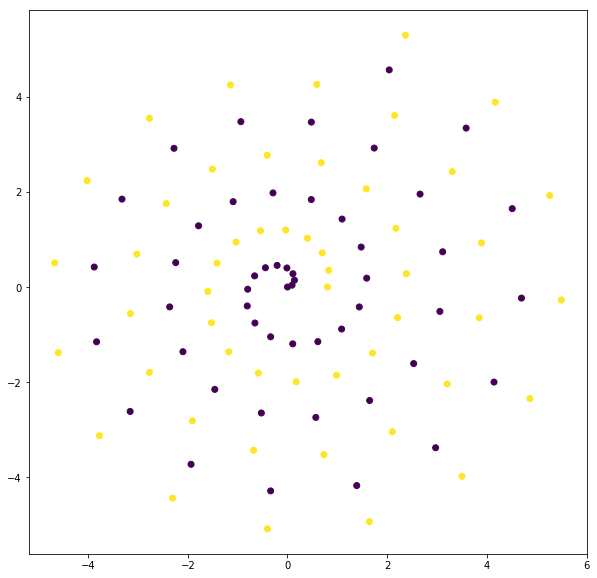

In [5]:
dt, dt_val = generate_dataset()
plt.scatter(dt[:,0], dt[:,1], c=dt[:,2])

In [0]:
x_train = dt[:,:2]
y_train = dt[:,2]

In [34]:
## SOM
from minisom import MiniSom 
dim = 14
som = MiniSom(dim, dim, 2, neighborhood_function='gaussian', sigma=2, random_seed=42) # initialization
som.pca_weights_init(x_train)
som.train_batch(x_train, 10000, verbose=True) # trains the SOM

 [ 10000 / 10000 ] 100% - 0.00055 it/s - quantization error: 0.28720843542961866


In [0]:
#w_all = np.random.rand(dim, dim).round()
w_all = np.zeros([dim, dim])

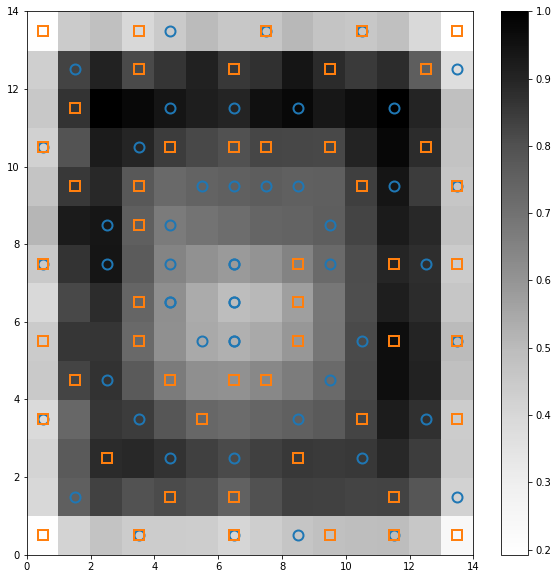

In [36]:

plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='Greys')  # plotting the distance map as background
plt.colorbar()

t = np.array(y_train, dtype=int)
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(x_train):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    w_all[w[0], w[1]] = t[cnt]
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=10, markeredgewidth=2)
plt.axis([0, dim, 0, dim])
plt.savefig('som_class.png')
plt.show()

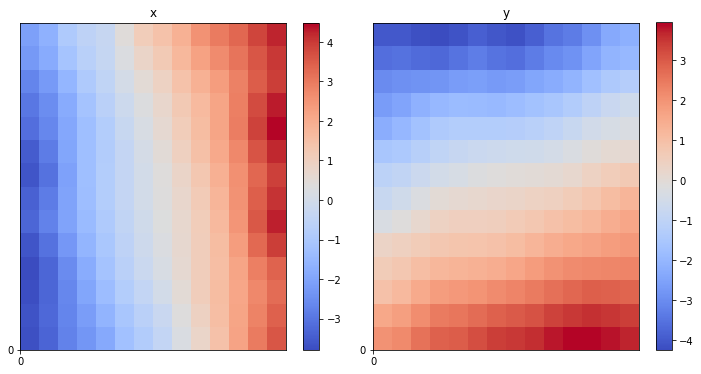

In [37]:
feature_names = ['x', 'y']

W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(0,dim+1, 25))
    plt.yticks(np.arange(0,dim+1, 25))
plt.tight_layout()
plt.show()

## TUDO DEPOIS DAQUI EH TESTE NAO VAI PARA O RELATORIO

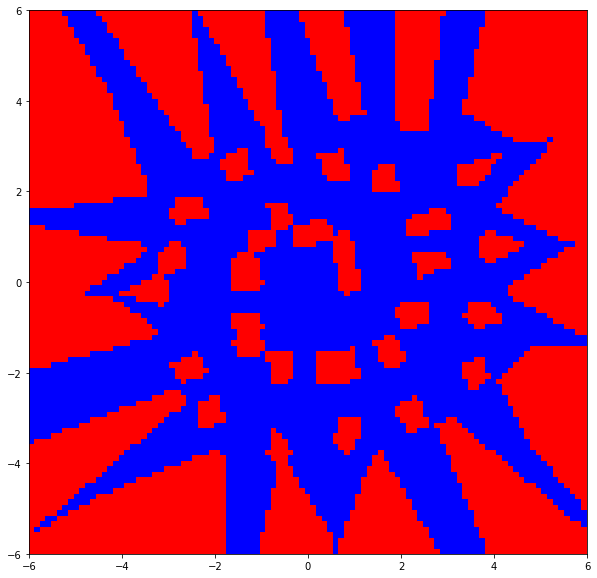

In [39]:
x = np.linspace(-6, 6, 100)

XX, YY = np.meshgrid(x, x)

XX_pred, YY_pred = XX.ravel(), YY.ravel()

grid_train = np.c_[XX_pred, YY_pred] 

points = []

for cnt, xx in enumerate(grid_train):
    w = som.winner(xx)
    points.append(w_all[w[0], w[1]])  # getting the winner

#points = (np.array(points) / np.max(points)).round()
points = np.array(points)


plt.pcolor(XX, YY, points.reshape(len(XX), -1), cmap='bwr')
#plt.scatter(dt_val[:,0], dt_val[:,1], c=dt_val[:,2])
# plt.savefig('grid_pred.png', dpi=300)

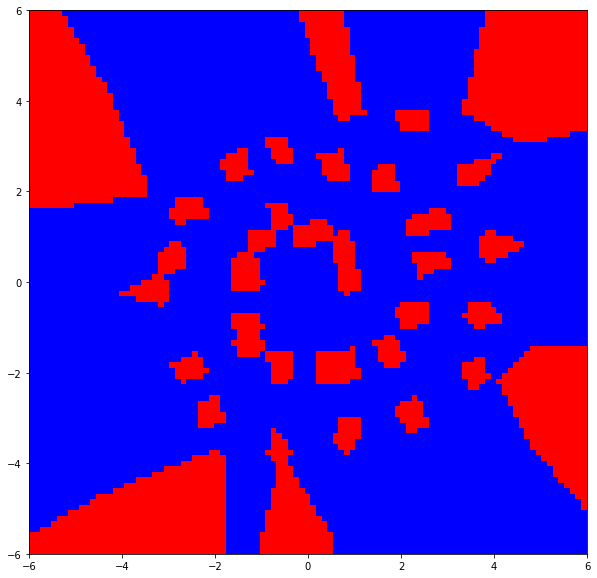

In [40]:
x = np.linspace(-6, 6, 100)

XX, YY = np.meshgrid(x, x)

XX_pred, YY_pred = XX.ravel(), YY.ravel()

grid_train = np.c_[XX_pred, YY_pred] 

som.labels_map(x_train, y_train)
pred = np.array(som.classify(grid_train))

plt.pcolor(XX, YY, pred.reshape(len(XX), -1), cmap='bwr')
#plt.scatter(dt_val[:,0], dt_val[:,1], c=dt_val[:,2])
# plt.savefig('grid_pred.png', dpi=300)